# Point Process Analysis Aggregation
A framework for evaluating the performance of centroid and proportional allocation approaches.

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import sys
import os
sys.path.insert(0, './src')

from src.aggregation_1d import *
from src.point_processes_2d import *
from src.visualization import *
from src.simulation2d import *
import matplotlib.pyplot as plt
import numpy as np
N = 500
dg = np.logspace(-3, -0.01, N)
dp = 0.5*np.ones(N)
ratio = dp / dg
rate = 200
x_range = (0,1)
y_range = (0,1)


# Empirical evaluation of homogeneous and non-homogeneous point process
Empirically compare proportional allocation and centroid allocation approaches under three forms of point process:
1. Homogeneous Poisson point process
2. Non-homogeneous Neyman Scott process
3. Non-homogeneous Log-Gaussian Cox process

### Generate samples from each type of point process

In [2]:
# Parameters for Poisson Process
N = rate

# Parameters for Neyman-Scott Process
lambda_p = 20
lambda_c = N / lambda_p
sigma = 0.05

# # Parameters for log-Gaussian Cox Process
# L = 1             # Length of domain
# dx = 0.05          # Bin width
# mean_log_intensity = np.log(N)  # Mean of log-intensity
# variance = 1     # Variance of the Gaussian Process
# length_scale = 0.05 # Length scale of covariance

sample_generator = {}
sample_generator['poisson'] = lambda rate, x_range, y_range: get_poisson_process_samples_2d(rate, x_range[0], x_range[1], y_range[0], y_range[1])
sample_generator['neyman-scott'] = lambda rate, x_range, y_range: get_neyman_scott_process_2d(lambda_p, rate / lambda_p, sigma, x_range[0], x_range[1], y_range[0], y_range[1])
sample_generator['lgcp'] = lambda rate, x_range, y_range: get_lgcp_2d(rate, x_range[0], x_range[1], y_range[0], y_range[1])

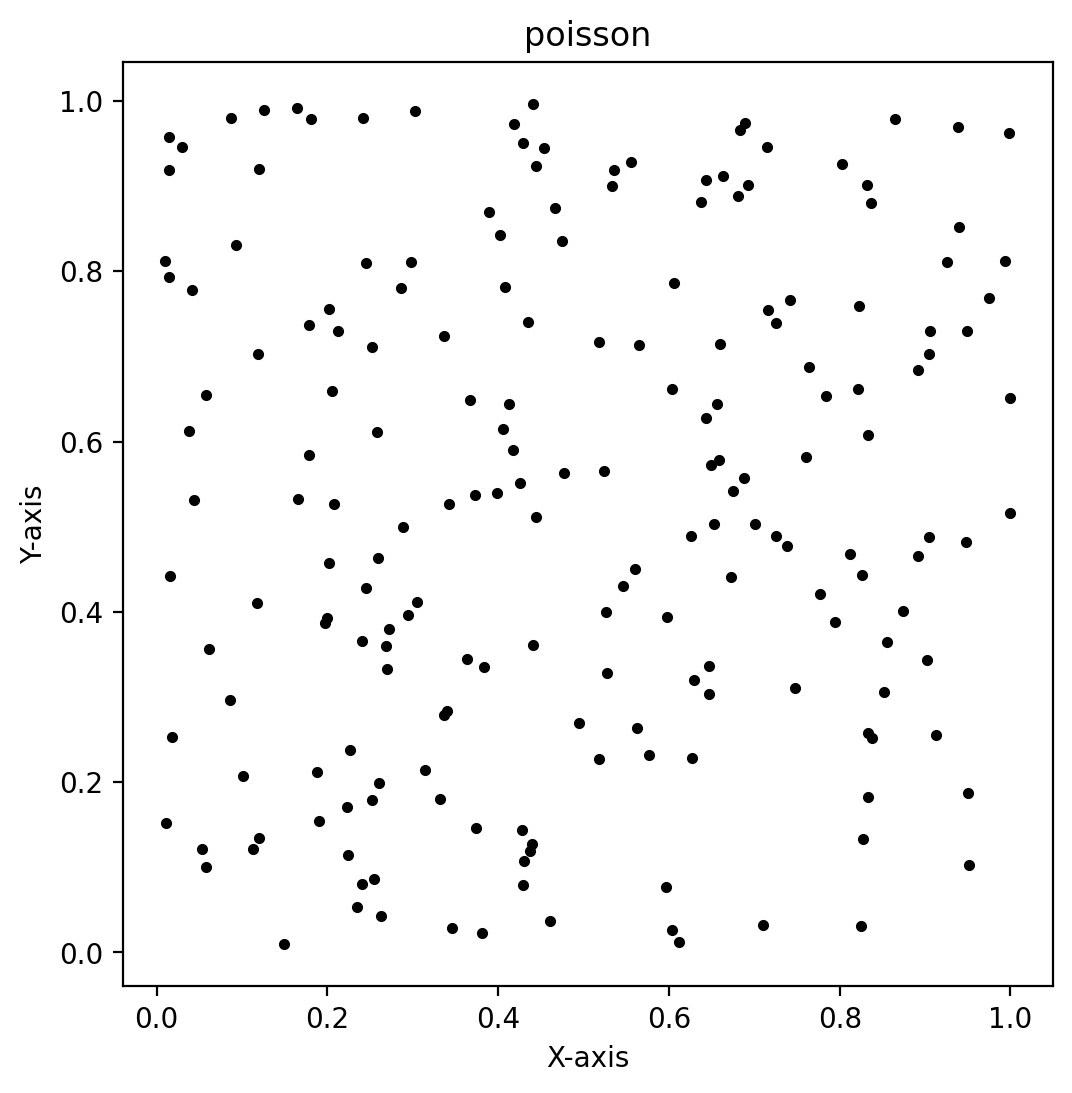

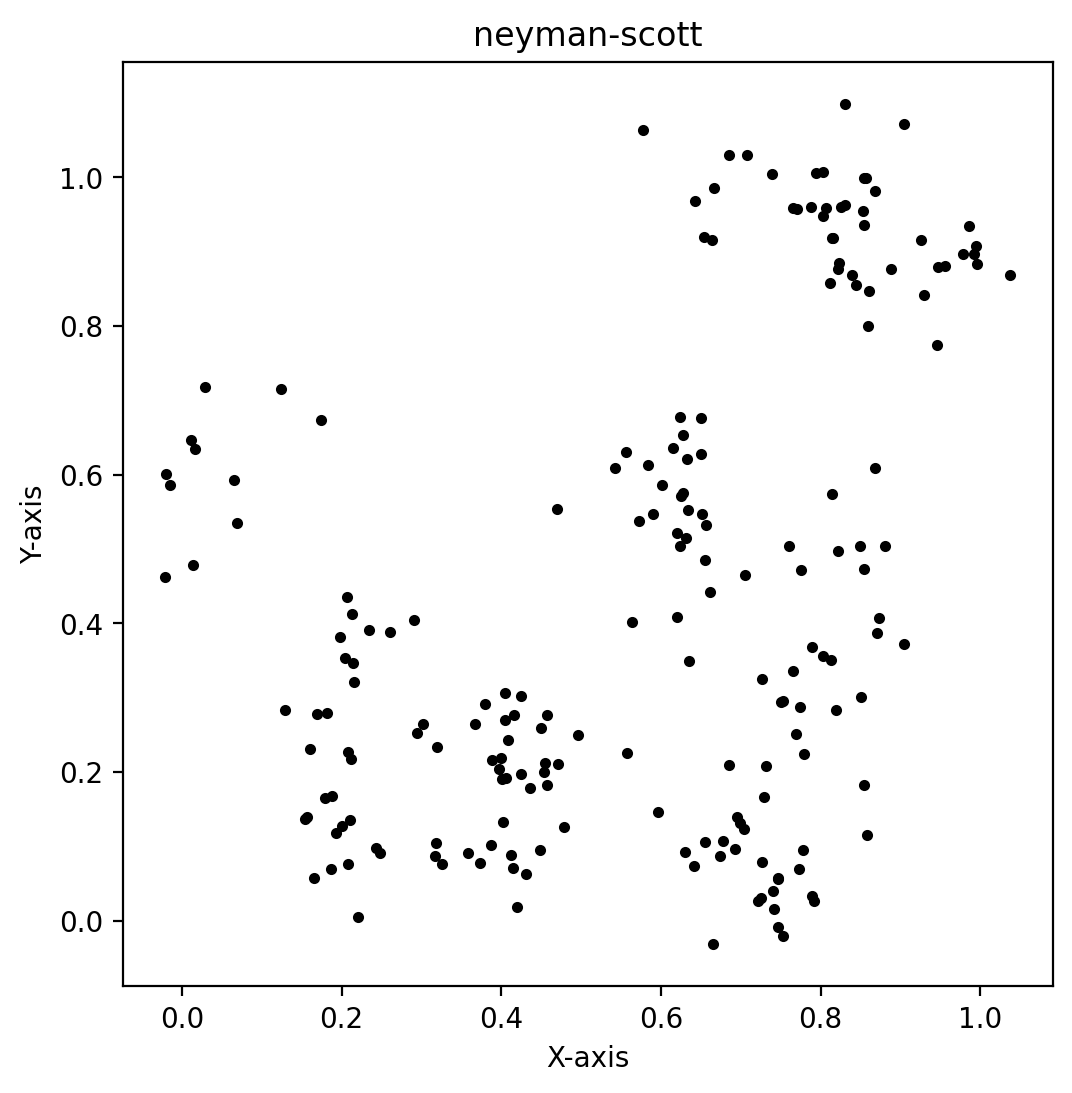

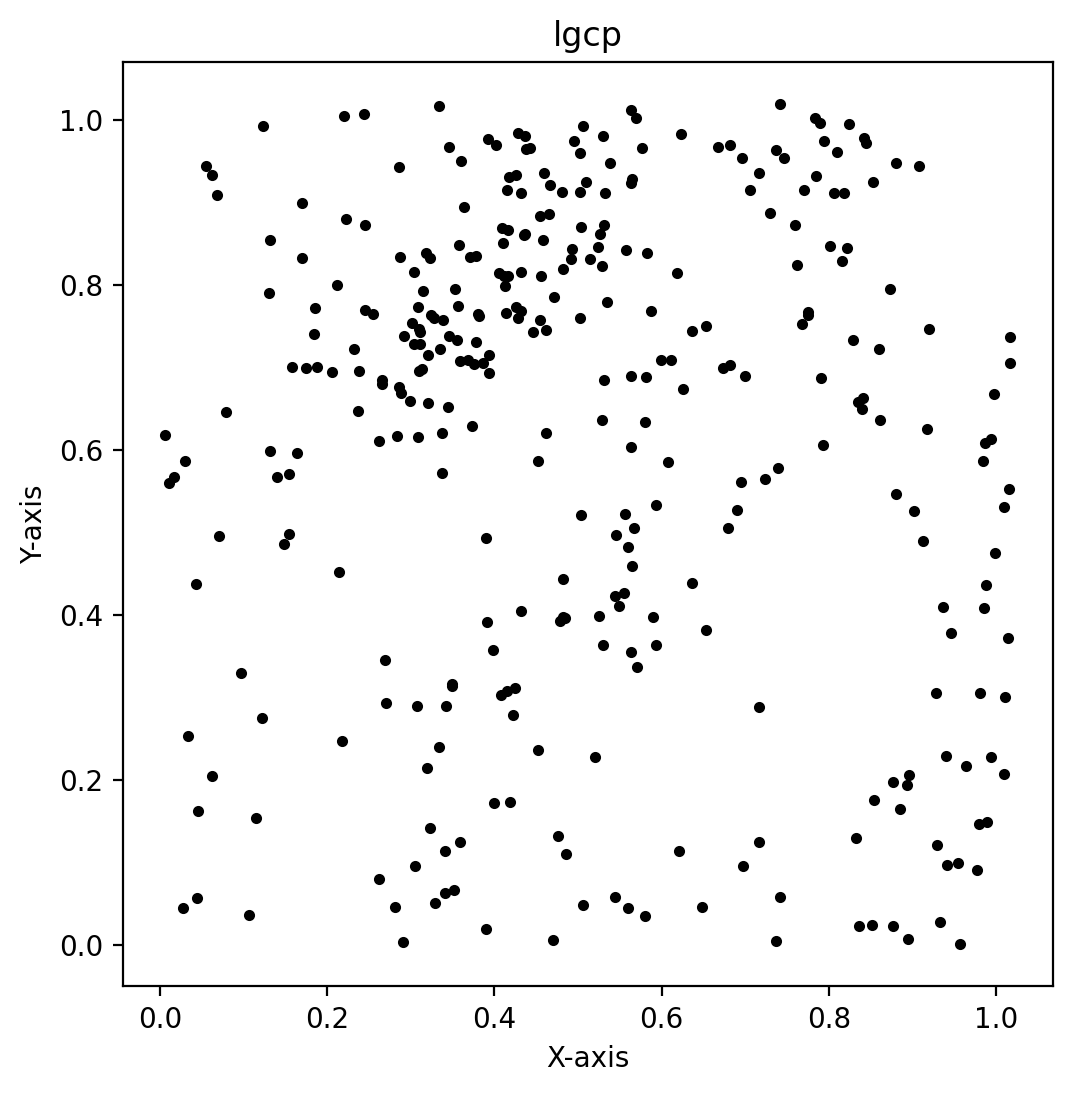

In [3]:
# Plot the samples
for key in sample_generator.keys():
    # Generate samples
    samples = sample_generator[key](rate, x_range, y_range)
    plot_two_d_samples(samples, key)
